## Author: Devendra Nagpure
## Roll Number: ME22D034

In [406]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Constants
t= 1 # time per cycle
E = 100000  # Young's modulus 
sigma_y0 = 1e-3 * E  # Initial yield strength
Et = 0.2 * E  # Tangent modulus for kinematic hardening
T = 10  # Total time
dt = 0.01  # Time step
N = int(T / dt)  # Number of time steps
cycles = int(T)  # Number of cycles

# Strain input: ε = 0.002 sin(2πt)
time = np.linspace(0, T, N)
strain = 0.002 * np.sin(2 * np.pi * time)

In [407]:
# Storage arrays
stress = np.zeros(N)
plastic_strain = np.zeros(N)
back_stress = np.zeros(N)
yield_strength = np.zeros(N)
plastic_arc_length= np.zeros(N)
beta= stress-back_stress

yield_strength[0]= sigma_y0

# Energy dissipation per cycle
energy_dissipation = np.zeros(cycles)

#  (i) Elastic perfectly plastic bar with Youngs modulus E and yield strength $\sigma_{y0}$
#### For perfectly plastic bar after the yield point there is no hardening, hardening coffecient H and K is "Zero" 

In [ ]:
for i in range(1,N):
    K=0  # Enter  kinematic hardening constant
    H=0  # Enter Isotropic hardening constant
    
    d_eps= strain[i]-strain[i-1]
    beta_trail= beta[i-1]+ E*d_eps
    yield_func= abs(beta_trail) - yield_strength[i - 1]

    if yield_func > 0:
        d_lambda= yield_func/ (E+K+H)
    else:
        d_lambda=0
    
    d_eps_p= d_lambda*np.sign(beta_trail)
    d_s= d_lambda

    plastic_strain[i]= plastic_strain[i-1]+d_eps_p
    plastic_arc_length[i]= plastic_arc_length[i-1]+ d_s
    yield_strength[i]= yield_strength[i-1] + H*d_s
    back_stress[i]= back_stress[i-1]+ K*d_eps_p
    stress[i]= E*(strain[i]-plastic_strain[i])
    beta[i]= stress[i]-back_stress[i]


# Compute energy dissipation at the end of each cycle
for cycle in range(cycles):
    cycle_start = cycle* int(t/dt)
    cycle_end = (cycle + 1) *int(t/dt)

    energy = np.trapz(stress[cycle_start:cycle_end], plastic_strain[cycle_start:cycle_end])
    energy_dissipation[cycle]= energy



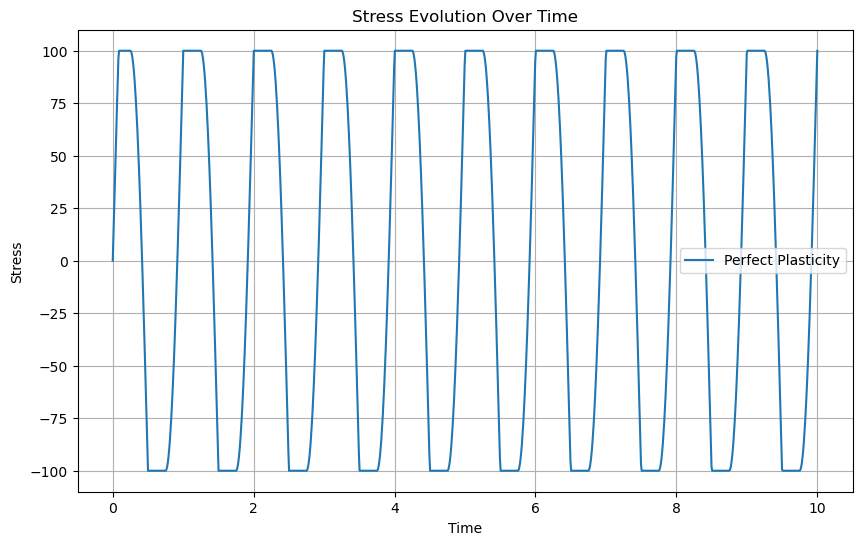

In [409]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, stress, label="Perfect Plasticity")
plt.xlabel("Time")
plt.ylabel("Stress")
plt.title("Stress Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

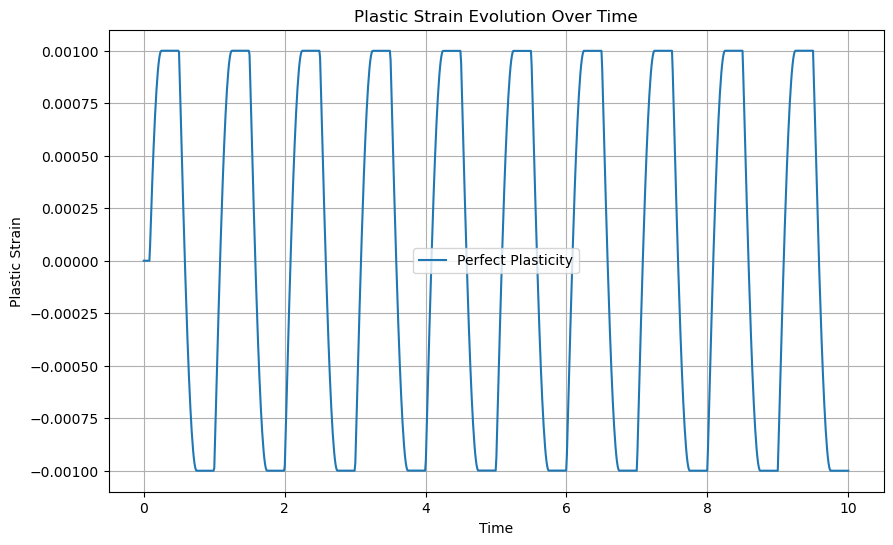

In [410]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, plastic_strain, label="Perfect Plasticity")
plt.xlabel("Time")
plt.ylabel("Plastic Strain")
plt.title("Plastic Strain Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

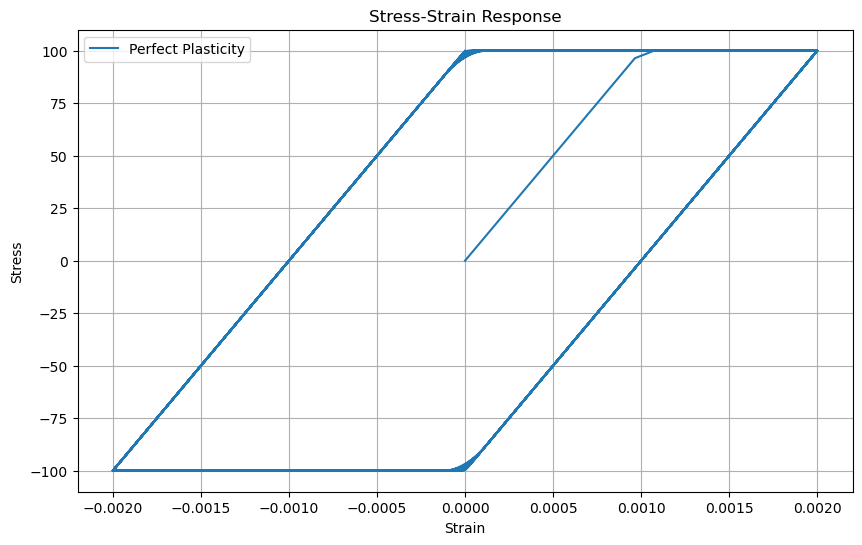

In [411]:
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label="Perfect Plasticity")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Stress-Strain Response")
plt.legend()
plt.grid()
plt.show()

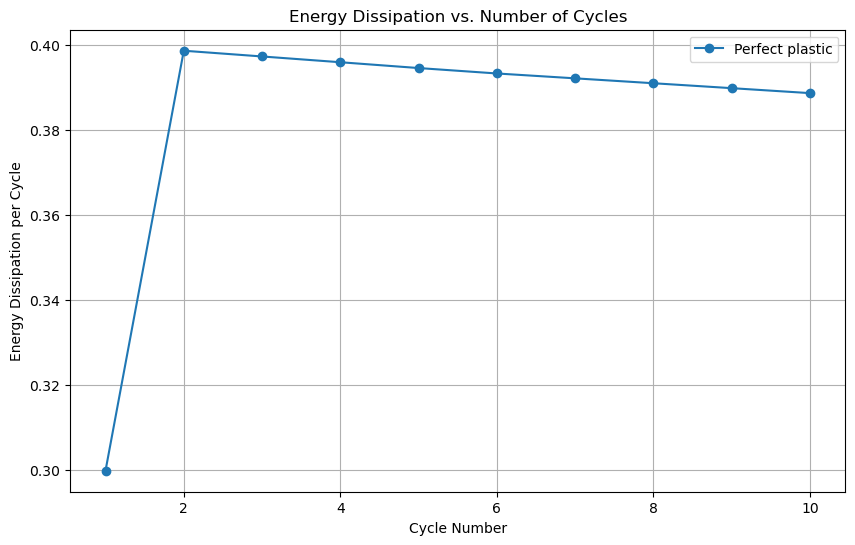

In [412]:
# Plot Energy Dissipation vs. Cycle
plt.figure(figsize=(10, 6))
plt.plot(range(1, cycles + 1), energy_dissipation, marker='o', linestyle='-', label="Perfect plastic")
plt.xlabel("Cycle Number")
plt.ylabel("Energy Dissipation per Cycle")
plt.title("Energy Dissipation vs. Number of Cycles")
plt.legend()
plt.grid(True)
plt.show()

# (ii) Elasto-plastic bar with linear kinematic hardening: Youngs modulus E, yield stress $\sigma_{y0}$ and tangent modulus Et = 0.2E in the plastic regime.
#### For Et to be 0.2E solveing the equation Et= 0.2Et and Et= EK/(E+K) to find K, i.e K= E/4

In [ ]:
for i in range(1,N):
    K= E/4  # Enter  kinematic hardening (For Et = 0.2E, Et= EK/(E+K), K= E/4)
    H=0  # Enter Isotropic hardening constant
    
    d_eps= strain[i]-strain[i-1]
    beta_trail= beta[i-1]+ E*d_eps
    yield_func= abs(beta_trail) - yield_strength[i - 1]

    if yield_func > 0:
        d_lambda= yield_func/ (E+K+H)
    else:
        d_lambda=0
    
    d_eps_p= d_lambda*np.sign(beta_trail)
    d_s= d_lambda

    plastic_strain[i]= plastic_strain[i-1]+d_eps_p
    plastic_arc_length[i]= plastic_arc_length[i-1]+ d_s
    yield_strength[i]= yield_strength[i-1] + H*d_s
    back_stress[i]= back_stress[i-1]+ K*d_eps_p
    stress[i]= E*(strain[i]-plastic_strain[i])
    beta[i]= stress[i]-back_stress[i]

# Compute energy dissipation at the end of each cycle
for cycle in range(cycles):
    cycle_start = cycle* int(t/dt)
    cycle_end = (cycle + 1) *int(t/dt)

    energy = np.trapz(stress[cycle_start:cycle_end], plastic_strain[cycle_start:cycle_end])
    energy_dissipation[cycle]= energy



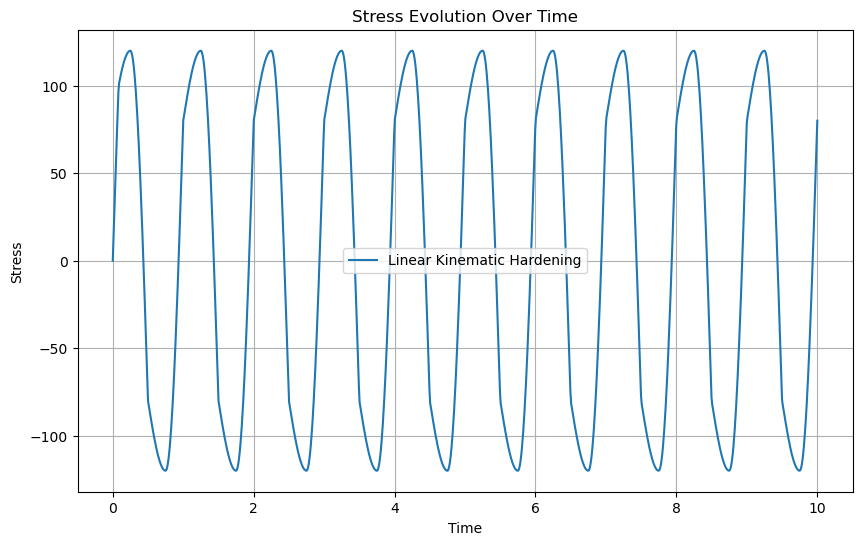

In [414]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, stress, label="Linear Kinematic Hardening")
plt.xlabel("Time")
plt.ylabel("Stress")
plt.title("Stress Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

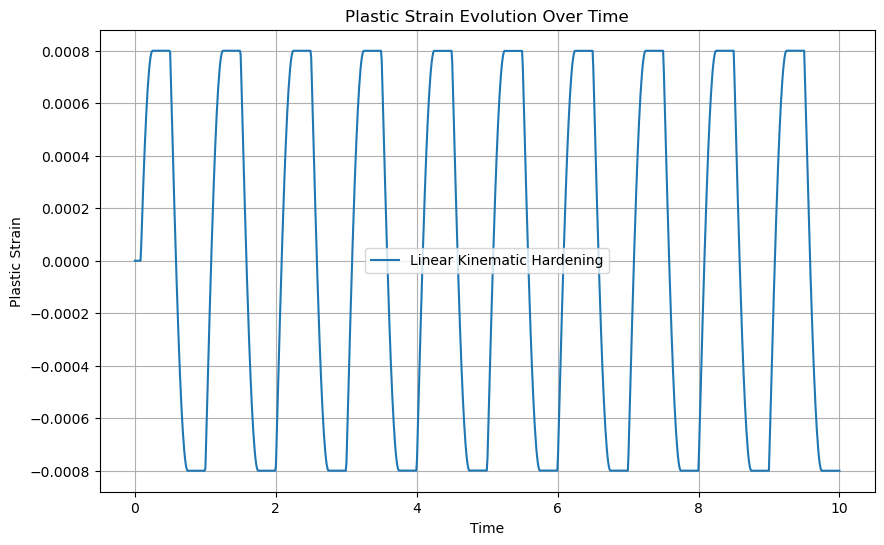

In [415]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, plastic_strain, label="Linear Kinematic Hardening")
plt.xlabel("Time")
plt.ylabel("Plastic Strain")
plt.title("Plastic Strain Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

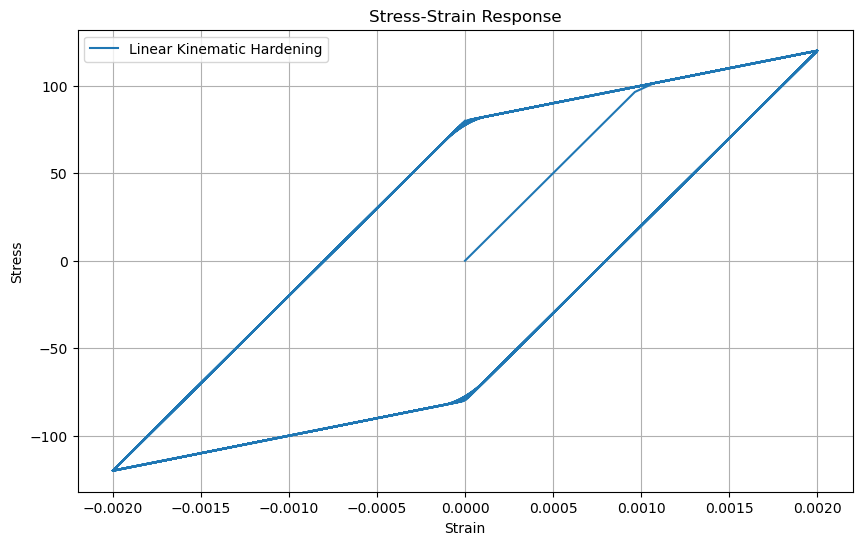

In [416]:
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label="Linear Kinematic Hardening")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Stress-Strain Response")
plt.legend()
plt.grid()
plt.show()

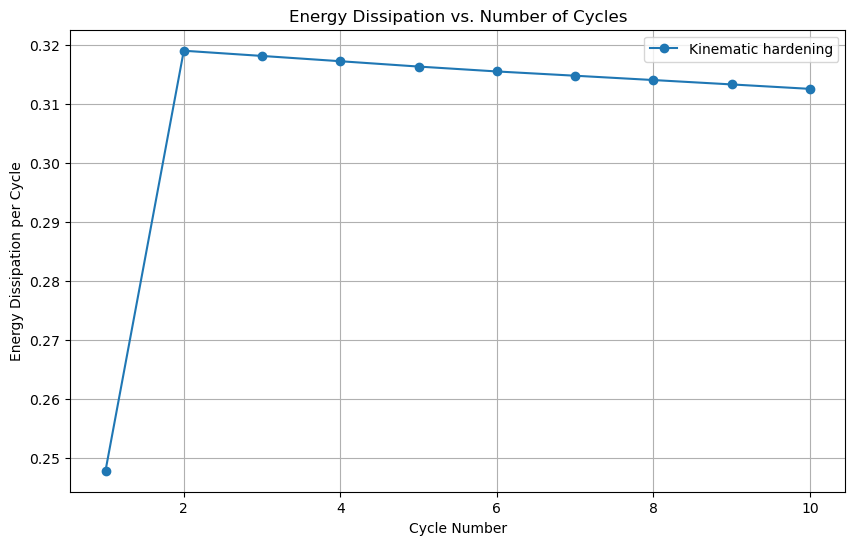

In [417]:
# Plot Energy Dissipation vs. Cycle
plt.figure(figsize=(10, 6))
plt.plot(range(1, cycles + 1), energy_dissipation, marker='o', linestyle='-', label="Kinematic hardening")
plt.xlabel("Cycle Number")
plt.ylabel("Energy Dissipation per Cycle")
plt.title("Energy Dissipation vs. Number of Cycles")
plt.legend()
plt.grid(True)
plt.show()

# (iii) Elasto-plastic bar with linear isotropic hardening: Youngs modulus E and yield strength $\sigma_y = \sigma_{y0} + 0.2Es$, where s is the plastic arc length whose evolution is given by the differential equation $s= |\dot{\epsilon}|$ .

In [418]:
for i in range(1,N):
    K= 0  # Enter Tangent modulus for kinematic hardening
    H= 0.2*E # Enter Isotropic hardening constant
    
    d_eps= strain[i]-strain[i-1]
    beta_trail= beta[i-1]+ E*d_eps
    yield_func= abs(beta_trail) - yield_strength[i - 1]

    if yield_func > 0:
        d_lambda= yield_func/ (E+K+H)
    else:
        d_lambda=0
    
    d_eps_p= d_lambda*np.sign(beta_trail)
    d_s= d_lambda

    plastic_strain[i]= plastic_strain[i-1]+d_eps_p
    plastic_arc_length[i]= plastic_arc_length[i-1]+ d_s
    yield_strength[i]= yield_strength[i-1] + H*d_s
    back_stress[i]= back_stress[i-1]+ K*d_eps_p
    stress[i]= E*(strain[i]-plastic_strain[i])
    beta[i]= stress[i]-back_stress[i]


# Compute energy dissipation at the end of each cycle
for cycle in range(cycles):
    cycle_start = cycle* int(t/dt)
    cycle_end = (cycle + 1) *int(t/dt)

    energy = np.trapz(stress[cycle_start:cycle_end], plastic_strain[cycle_start:cycle_end])
    energy_dissipation[cycle]= energy

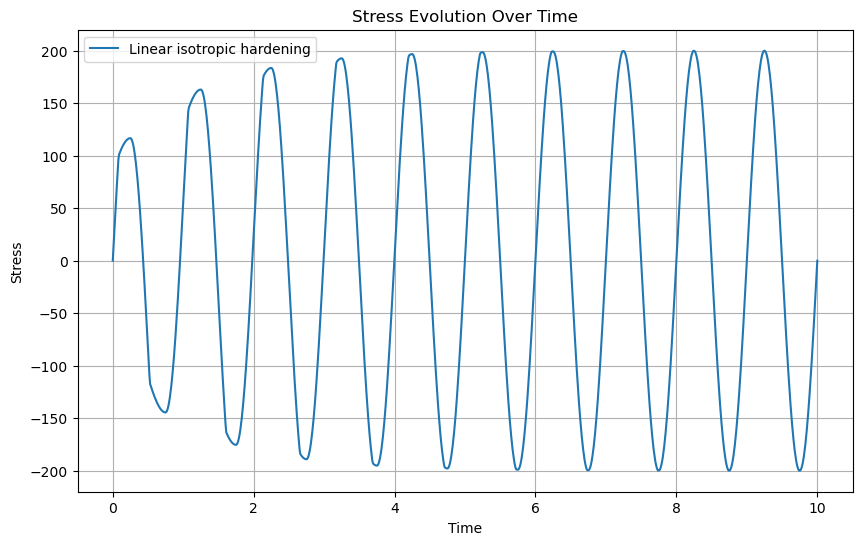

In [419]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, stress, label="Linear isotropic hardening")
plt.xlabel("Time")
plt.ylabel("Stress")
plt.title("Stress Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

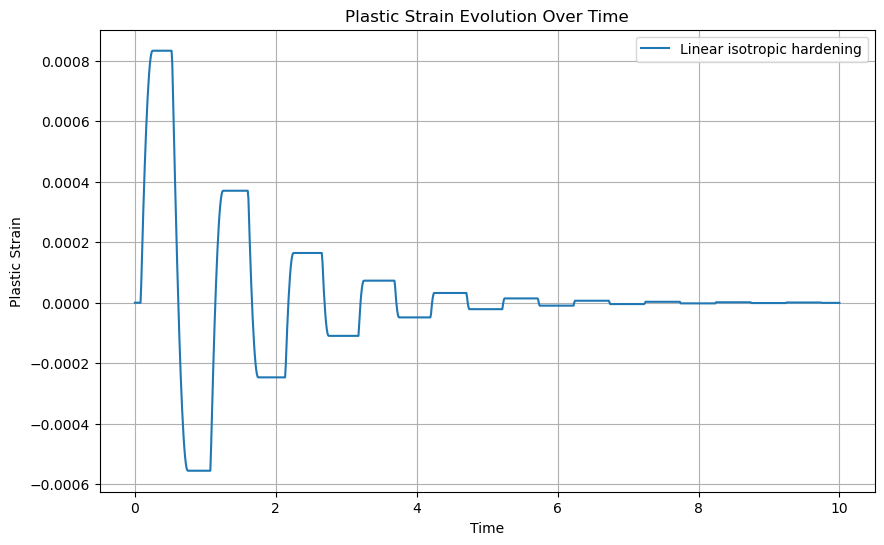

In [420]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, plastic_strain, label="Linear isotropic hardening")
plt.xlabel("Time")
plt.ylabel("Plastic Strain")
plt.title("Plastic Strain Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

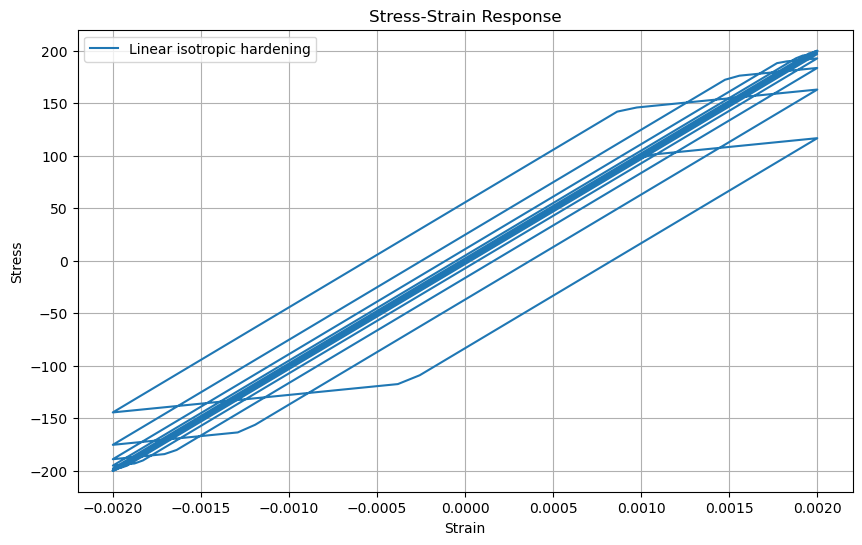

In [421]:
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label="Linear isotropic hardening")
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.title("Stress-Strain Response")
plt.legend()
plt.grid()
plt.show()

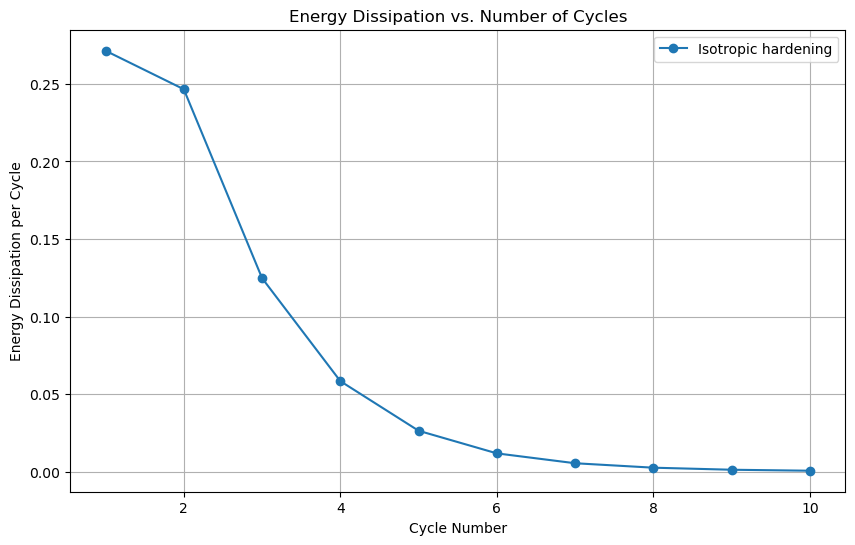

In [422]:
# Plot Energy Dissipation vs. Cycle
plt.figure(figsize=(10, 6))
plt.plot(range(1, cycles + 1), energy_dissipation, marker='o', linestyle='-', label="Isotropic hardening")
plt.xlabel("Cycle Number")
plt.ylabel("Energy Dissipation per Cycle")
plt.title("Energy Dissipation vs. Number of Cycles")
plt.legend()
plt.grid(True)
plt.show()